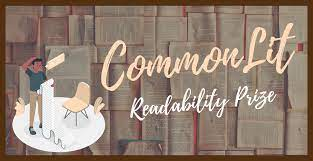


 <a id="1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Make EDA and using the ML to Preduction</p>
### Introduction
Hi, all in first ask your self-question: **Do you love reading** do you interest when you reading a book. if not. then you must read the book we know that reading is very hopeful and increasing your mind.
> This Notebook contant that: 
1. Cleaning Data:
    * Removing Punctuations and Numbers
    * Performing Tokenization
    * Removing Special and Accented Characters
    
2. Feature Engineering:
   * Reading and Summarizing Data
   * Finding the Length, Polarity and Subjectivity of the Text
   * Finding the Words, Characters, and Punctuation Count
   * Counting Nouns and Verbs in the Text
   * Counting Adjectives, Adverbs, and Pronouns
   
3. Feature Extraction:
      * Implementing Bag of Words and TF-IDF
      * Implementing N Grams Analysis
   
4. Data Visualization
    *   Visualizing Polarity and Subjectivity
    *   Part-of-Speech Tagging
    *   Visualizing Most Frequent Words
    *   Words Cloud

 <a id="1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Importing Libraries</p>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import re
# for data cleaning
import string
# for calculating Polarity and Subjectivity
from textblob import TextBlob
# import all the necessary libraries
import warnings
#for Tokenization
import nltk
 #for Wordscloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
#Ignoring unnecessory warnings
warnings.filterwarnings("ignore")                   
# for stopwords Removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# for removing accented and special chracters
import plotly.express as px
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier              #for data manipulation and analysis 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import zero_one_loss
from sklearn.linear_model import LinearRegression



 <a id="1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Reading and summarizeing Data</p>

In [2]:
# reading train dataset
train_df=pd.read_csv('../input/commonlitreadabilityprize/train.csv')
# reading test dataset
test_df=pd.read_csv('../input/commonlitreadabilityprize/test.csv')
print(train_df.shape)
train_df.head(10)

(2834, 6)


,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845
5,f9bf357fe,NaN,NaN,Hal and Chester found ample time to take an in...,-0.861809,0.480936
6,eaf8e7355,NaN,NaN,Hal Paine and Chester Crawford were typical Am...,-1.759061,0.476507
7,0a43a07f1,NaN,NaN,"On the twenty-second of February, 1916, an aut...",-0.952325,0.498116
8,f7eff7419,NaN,NaN,The boys left the capitol and made their way d...,-0.371641,0.463710
9,d96e6dbcd,NaN,NaN,One day he had gone beyond any point which he ...,-1.238432,0.465900


### Data Cleaning
    Make a clean for data from NAN value

In [3]:
train_df.isna().sum()

id                   0
url_legal         2004
license           2004
excerpt              0
target               0
standard_error       0
dtype: int64

* we see this columns have NAN mising value
* will drop for NAN columns

In [4]:
def data_clean(train_df):
    train_df.fillna(0,inplace=True)
    print(train_df.isnull().sum())
    
data_clean(train_df)

id                0
url_legal         0
license           0
excerpt           0
target            0
standard_error    0
dtype: int64


In [5]:
# First lets remove Punctuations from the Reviews
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

train_df['excerpt'] = train_df['excerpt'].apply(punctuation_removal)

In [6]:
# lets make a function to remove Numbers from the reviews
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

train_df['excerpt'] = train_df['excerpt'].apply(drop_numbers)

In [7]:
train_df['excerpt'].head(2).value_counts()

When the young people returned to the ballroom it presented a decidedly changed appearance Instead of an interior scene it was a winter landscape\nThe floor was covered with snowwhite canvas not laid on smoothly but rumpled over bumps and hillocks like a real snow field The numerous palms and evergreens that had decorated the room were powdered with flour and strewn with tufts of cotton like snow Also diamond dust had been lightly sprinkled on them and glittering crystal icicles hung from the branches\nAt each end of the room on the wall hung a beautiful bearskin rug\nThese rugs were for prizes one for the girls and one for the boys And this was the game\nThe girls were gathered at one end of the room and the boys at the other and one end was called the North Pole and the other the South Pole Each player was given a small flag which they were to plant on reaching the Pole\nThis would have been an easy matter but each traveller was obliged to wear snowshoes    1
All through dinner time 


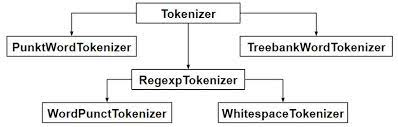

 <a id="1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Tokenization</p>

    In Python tokenization basically refers to splitting up a larger body of text into smaller lines, words or even creating words for a non-English language. The various tokenization functions in-built into the nltk module

In [8]:
# sentence Tokenizations
sentence_data = '''Hal and Chester found ample time to take an i
nventory of the generals car It was a huge machine and besides being fitted up 
luxuriously was also furnished as an office that the general might still be at work
while he hurried from one part of the field to another 
when events demanded his immediate presence Even now with 
treachery threatening and whirling along at a terrific speed General Joffre 
probably because of habit fell to work sorting papers studying maps and other
drawings\nFor almost two hours the car whirled along at top speed and at length
pulled up in the rear of an immense body of troops who even to Hal and Chester could 
be seen preparing for an advance General Joffre was out of the car before it came to
a full stop and Hal and Chester were at his heels An orderly approached\nMy respects 
to General Tromp and tell him I desire his presence immediately ordered General Joffre '''                                                                                                              

nltk_tokens = nltk.sent_tokenize(sentence_data)
print (nltk_tokens)

['Hal and Chester found ample time to take an i\nnventory of the generals car It was a huge machine and besides being fitted up \nluxuriously was also furnished as an office that the general might still be at work\nwhile he hurried from one part of the field to another \nwhen events demanded his immediate presence Even now with \ntreachery threatening and whirling along at a terrific speed General Joffre \nprobably because of habit fell to work sorting papers studying maps and other\ndrawings\nFor almost two hours the car whirled along at top speed and at length\npulled up in the rear of an immense body of troops who even to Hal and Chester could \nbe seen preparing for an advance General Joffre was out of the car before it came to\na full stop and Hal and Chester were at his heels An orderly approached\nMy respects \nto General Tromp and tell him I desire his presence immediately ordered General Joffre']


In [9]:
# Words Tokenization
word_data =  '''Hal and Chester found ample time to take an i
nventory of the generals car It was a huge machine and besides being fitted up 
luxuriously was also furnished as an office that the general might still be at work
while he hurried from one part of the field to another 
when events demanded his immediate presence Even now with 
treachery threatening and whirling along at a terrific speed General Joffre 
probably because of habit fell to work sorting papers studying maps and other
drawings\nFor almost two hours the car whirled along at top speed and at length
pulled up in the rear of an immense body of troops who even to Hal and Chester could 
be seen preparing for an advance General Joffre was out of the car before it came to
a full stop and Hal and Chester were at his heels An orderly approached\nMy respects 
to General Tromp and tell him I desire his presence immediately ordered General Joffre '''

nltk_tokens = nltk.word_tokenize(word_data)
print (nltk_tokens)

['Hal', 'and', 'Chester', 'found', 'ample', 'time', 'to', 'take', 'an', 'i', 'nventory', 'of', 'the', 'generals', 'car', 'It', 'was', 'a', 'huge', 'machine', 'and', 'besides', 'being', 'fitted', 'up', 'luxuriously', 'was', 'also', 'furnished', 'as', 'an', 'office', 'that', 'the', 'general', 'might', 'still', 'be', 'at', 'work', 'while', 'he', 'hurried', 'from', 'one', 'part', 'of', 'the', 'field', 'to', 'another', 'when', 'events', 'demanded', 'his', 'immediate', 'presence', 'Even', 'now', 'with', 'treachery', 'threatening', 'and', 'whirling', 'along', 'at', 'a', 'terrific', 'speed', 'General', 'Joffre', 'probably', 'because', 'of', 'habit', 'fell', 'to', 'work', 'sorting', 'papers', 'studying', 'maps', 'and', 'other', 'drawings', 'For', 'almost', 'two', 'hours', 'the', 'car', 'whirled', 'along', 'at', 'top', 'speed', 'and', 'at', 'length', 'pulled', 'up', 'in', 'the', 'rear', 'of', 'an', 'immense', 'body', 'of', 'troops', 'who', 'even', 'to', 'Hal', 'and', 'Chester', 'could', 'be', 's

### Removing Accented Characters

Accented characters are important elements which are used to signify emphasis on a particular word during pronunciation or understanding. In some instances, the accent mark also clarifies the meaning of a word, which might be different without the accent. While their use in English is largely limited but there are very good chances that you will come across accented characters/letters in a free text corpus. Words such as résumé, café, prótest, divorcé, coördinate, exposé, latté etc

In [10]:
# lets create a function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

# lets apply the function
train_df['excerpt'] = train_df.apply(lambda x: remove_accented_chars(x['excerpt']), axis = 1)

### Removing Special Characters

Special characters, as you know, are non-alphanumeric characters. These characters are most often found in comments, references, currency numbers etc. These characters add no value to text-understanding and induce noise into algorithms. Thankfully, regular-expressions (regex) can be used to get rid of these characters and numbers.

In [11]:
#Create a function to remove special characters
def remove_special_characters(text):
    pat = r'[^a-zA-z0-9]' 
    return re.sub(pat, ' ', text)
 
# lets apply this function
train_df['excerpt'] = train_df.apply(lambda x: remove_special_characters(x['excerpt']), axis = 1)

In [12]:
train_df['excerpt'][:5]

0    When the young people returned to the ballroom...
1    All through dinner time Mrs Fayre was somewhat...
2    As Roger had predicted the snow departed as qu...
3    And outside before the palace a great garden w...
4    Once upon a time there were Three Bears who li...
Name: excerpt, dtype: object

* Now it's very clean

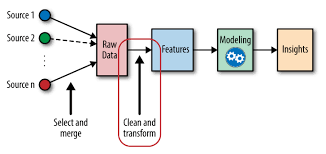


<h1><center> Feature Engineering</center></h1>

In [13]:
train_df.describe().style.background_gradient(cmap = 'copper')

,target,standard_error
count,2834.000000,2834.000000
mean,-0.959319,0.491435
std,1.033579,0.034818
min,-3.676268,0.000000
25%,-1.690320,0.468543
50%,-0.912190,0.484721
75%,-0.202540,0.506268
max,1.711390,0.649671


In [14]:
# lets check the summary of Date, Variation and Reviews
train_df.describe(include = 'object').style.background_gradient(cmap = 'copper')

,id,url_legal,license,excerpt
count,2834,2834,2834,2834
unique,2834,668,16,2833
top,3ec443d49,0,0,Goat Dog and Cow were great friends One day they went on a journey in a taxi They reached the end of their journey The driver asked them to pay their fares Cow paid her fare Dog paid extra because he did not have the correct money The driver was about to give Dog his change Suddenly Goat ran away without paying The driver was very annoyed He drove away without giving Dog his change That is why even today Dog runs towards a car to peep inside He is looking for the driver who owes him change Goat runs away from the sound of a car She is afraid she will be arrested for not paying her fare Cow is not bothered by cars Cow takes her time crossing the road She knows she paid her fare in full
freq,1,2004,2004,2


In [15]:
# Lets calculate the length of the Reviews
train_df['length'] = train_df['excerpt'].apply(len)

### Text Polarity

    It is the expression that determines the sentimental aspect of an opinion. In textual data, the result of sentiment analysis can be determined for each entity in the sentence, document or sentence. The sentiment polarity can be determined as positive, negative and neutral.

In [16]:
# Lets calculate the Polarity of the Reviews
def get_polarity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    pol = textblob.sentiment.polarity
    return pol

# lets apply the function
train_df['polarity'] = train_df['excerpt'].apply(get_polarity)

### Text Subjectivity

    In natural language, subjectivity refers to expression of opinions, evaluations, feelings, and speculations and thus incorporates sentiment. Subjective text is further classified with sentiment or polarity.

In [17]:
# Lets calculate the Subjectvity of the Reviews
def get_subjectivity(text):
    textblob = TextBlob(str(text.encode('utf-8')))
    subj = textblob.sentiment.subjectivity
    return subj

# lets apply the Function
train_df['subjectivity'] = train_df['excerpt'].apply(get_subjectivity)

In [18]:
## lets summarize the Newly Created Features
train_df[['length','polarity','subjectivity']].describe().style.background_gradient(cmap = 'copper')

,length,polarity,subjectivity
count,2834.000000,2834.000000,2834.000000
mean,940.932251,0.098573,0.469087
std,115.517298,0.113512,0.103289
min,638.000000,-0.313889,0.058333
25%,857.250000,0.026286,0.401203
50%,941.000000,0.093143,0.470084
75%,1023.000000,0.168954,0.541169
max,1301.000000,0.590909,0.937500


In [19]:
# calculating the Character Count in the Reviews
train_df['char_count'] = train_df['excerpt'].apply(len)

In [20]:
# calculating the Word Count
train_df['word_count'] = train_df['excerpt'].apply(lambda x: len(x.split()))

In [21]:
# Calculating the Word Density
train_df['word_density'] = train_df['char_count'] / (train_df['word_count']+1)

In [22]:
punctuation = string.punctuation

# Calculating the Punctuation Count
train_df['punctuation_count'] = train_df['excerpt'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 

In [23]:
## lets summarize the Newly Created Features
train_df[['char_count','word_count','word_density','punctuation_count']].describe().style.background_gradient(cmap = 'copper')

,char_count,word_count,word_density,punctuation_count
count,2834.000000,2834.000000,2834.000000,2834.000000
mean,940.932251,172.259704,5.433844,0.000000
std,115.517298,17.014568,0.443125,0.000000
min,638.000000,112.000000,4.115183,0.000000
25%,857.250000,159.000000,5.126904,0.000000
50%,941.000000,174.000000,5.390055,0.000000
75%,1023.000000,187.000000,5.702217,0.000000
max,1301.000000,205.000000,7.826923,0.000000


In [24]:
 #lets create a Part of speech Dictionary
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

# function to check and get the part of speech tag count of a words in a given sentence
def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

### Nouns

    A noun is a word that functions as the name of a specific object or set of objects, such as living creatures, places, actions, qualities, states of existence, or ideas. However, noun is not a semantic category, so that it cannot be characterized in terms of its meaning.

In [25]:
# lets calculate the count of Nouns in the Text
train_df['noun_count'] = train_df['excerpt'].apply(lambda x: pos_check(x, 'noun'))

### Verbs

    A verb, from the Latin verbum meaning word, is a word that in syntax conveys an action, an occurrence, or a state of being. In the usual description of English, the basic form, with or without the particle to, is the infinitive. In many languages, verbs are inflected to encode tense, aspect, mood, and voice.

In [26]:
# lets calculate the count of Verbs in the Text
train_df['verb_count'] = train_df['excerpt'].apply(lambda x: pos_check(x, 'verb'))

In [27]:
#3 lets summarize the Newly Created Features
train_df[['noun_count','verb_count']].describe().style.background_gradient(cmap = 'copper')

,noun_count,verb_count
count,2834.000000,2834.000000
mean,44.707481,30.820748
std,10.111495,6.721239
min,17.000000,9.000000
25%,37.000000,26.000000
50%,44.000000,30.000000
75%,51.000000,35.000000
max,84.000000,57.000000


### Adjectives

    In linguistics, an adjective is a word that modifies a noun or noun phrase or describes its referent. Its semantic role is to change information given by the noun. Adjectives are one of the main parts of speech of the English language, although historically they were classed together with nouns.

In [28]:
# lets calculate the Count of Adjectives in the Text
train_df['adj_count'] = train_df['excerpt'].apply(lambda x: pos_check(x, 'adj'))

### Adverbs

    An adverb is a word or an expression that modifies a verb, adjective, another adverb, determiner, clause, preposition, or sentence. Adverbs typically express manner, place, time, frequency, degree, level of certainty, etc., answering questions such as how?, in what way?, when?, where?, and to what extent?

In [29]:
# lets calculate the count of Adverbs in the Text
train_df['adv_count'] = train_df['excerpt'].apply(lambda x: pos_check(x, 'adv'))

### Pronouns

    A pronoun (I, me, he, she, herself, you, it, that, they, each, few, many, who, whoever, whose, someone, everybody, etc.) is a word that takes the place of a noun. In the sentence Joe saw Jill, and he waved at her, the pronouns he and her take the place of Joe and Jill, respectively.

In [30]:
# lets calculate the count of Pronouns in the Text
train_df['pron_count'] = train_df['excerpt'].apply(lambda x: pos_check(x, 'pron'))

In [31]:
## lets summarize the Newly Created features
train_df[['adj_count','adv_count','pron_count']].describe().style.background_gradient(cmap = 'copper')

,adj_count,adv_count,pron_count
count,2834.000000,2834.000000,2834.000000
mean,13.435427,9.942837,13.320748
std,5.123421,4.407209,8.273933
min,1.000000,0.000000,0.000000
25%,10.000000,7.000000,6.000000
50%,13.000000,10.000000,13.000000
75%,17.000000,13.000000,19.000000
max,35.000000,29.000000,41.000000


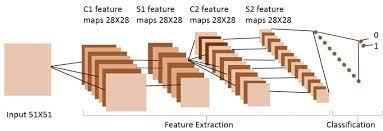


 <a id="1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Feature Extraction</p>


### Bag of Words

    The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

In [32]:
# creating bag of words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 30000)

X = cv.fit_transform(train_df['excerpt']).toarray()
y = train_df.iloc[:, 4].values

print(X.shape)
print(y.shape)

(2834, 29165)
(2834,)


In [33]:
X[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
y[:10]

array([-0.34025912, -0.31537234, -0.58011797, -1.05401339,  0.24719745,
       -0.86180858, -1.7590614 , -0.95232462, -0.37164069, -1.23843222])

### Spliting data

In [35]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [36]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 10000000, criterion='mse',
    splitter='best')
regressor.fit(X, y)

DecisionTreeRegressor(random_state=10000000)

In [38]:
# Predicting a new result
y_pred=regressor.predict(X_train)
y_pred

array([-0.25624463,  0.17097234,  0.16641751, ...,  0.32598798,
       -0.96817995, -0.27479738])

In [39]:
score=regressor.score(X_train,y_train)
score

-0.676660814831509

In [40]:
#Fitting Linear Regression to the data set
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

In [41]:
#Calculating Details
print('LogisticRegressionModel Train Score is : ' , lin_reg .score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , lin_reg .score(X_test, y_test))


LogisticRegressionModel Train Score is :  1.0
LogisticRegressionModel Test Score is :  0.44480511229363606


In [42]:
#Calculating Prediction
y_pred = lin_reg.predict(X_test)
print("The Preduction:\n",list(y_pred[:5]))

The Preduction:
 [-0.02203702835361987, -0.5333005811387991, -0.35137006681776395, -1.7246642374749683, -0.774495113947726]



 <a id="1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">Visualization for data</p>

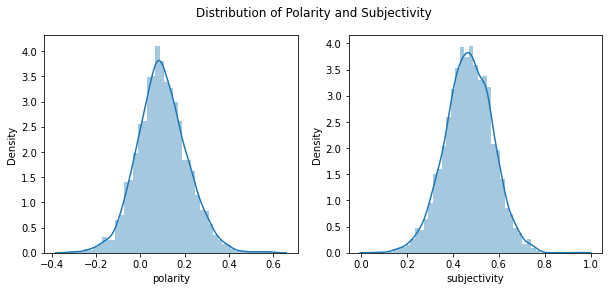

In [43]:
## Visualizing Polarity and Subjectivity

plt.rcParams['figure.figsize'] = (10, 4)

plt.subplot(1, 2, 1)
sns.distplot(train_df['polarity'])

plt.subplot(1, 2, 2)
sns.distplot(train_df['subjectivity'])

plt.suptitle('Distribution of Polarity and Subjectivity')
plt.show()

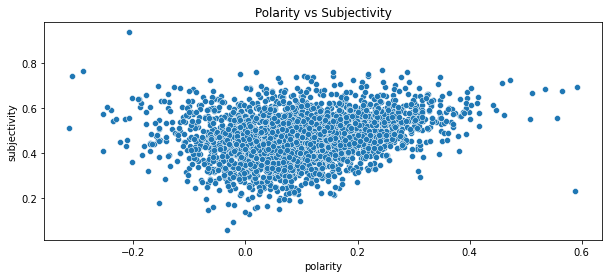

In [44]:
# lets check relation between Polarity and Subjectivity

sns.scatterplot(train_df['polarity'], train_df['subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.show()

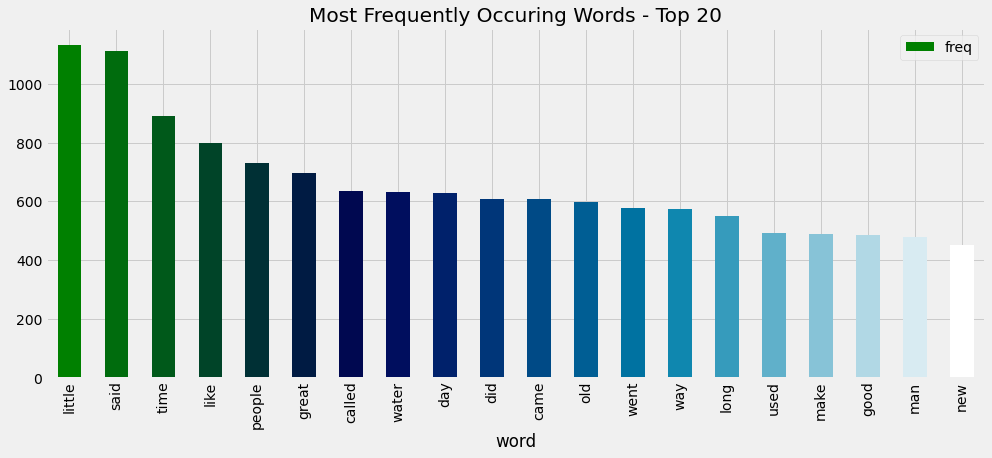

In [45]:
## Visualizing the Most Frequent Words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_df['excerpt'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 20")
plt.show()

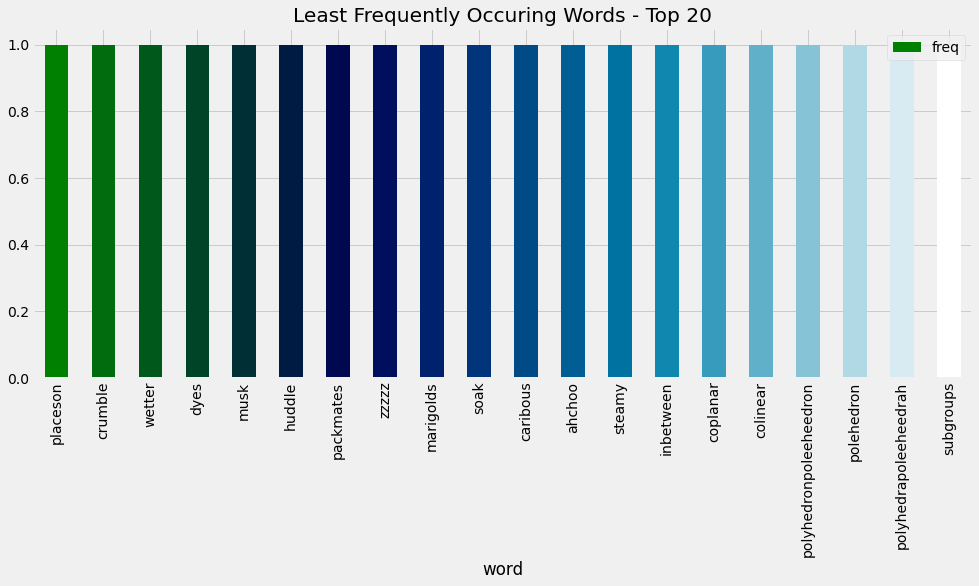

In [46]:
## Visualizing the Least Frequent Words

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_df['excerpt'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.tail(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Least Frequently Occuring Words - Top 20")
plt.show()

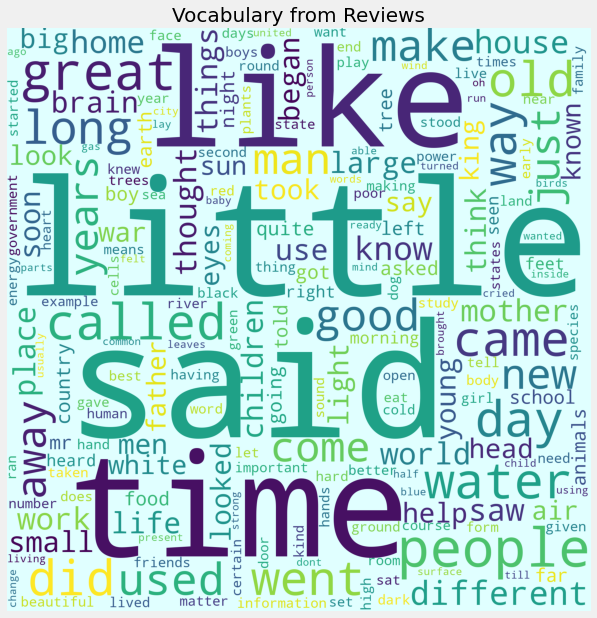

In [47]:
# lets plot the Wordscloud

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_df['excerpt'])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

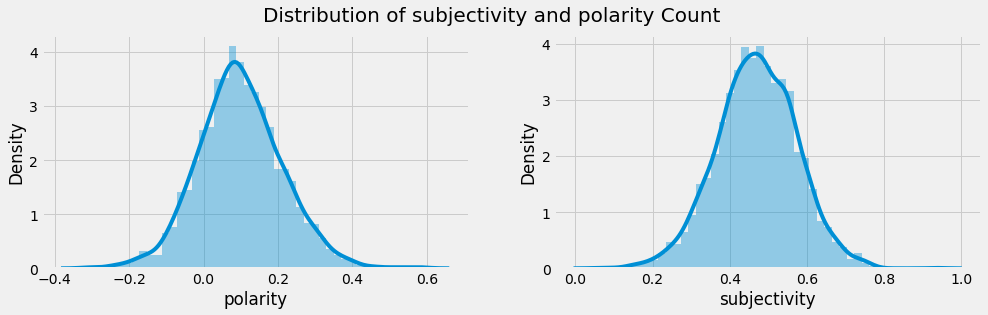

In [48]:
# lets check the Distribution of Rating and Useful Count

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1, 2, 1)
sns.distplot(train_df['polarity'])

plt.subplot(1, 2, 2)
sns.distplot(train_df['subjectivity'])

plt.suptitle('Distribution of subjectivity and polarity Count \n ', fontsize = 20)
plt.show()

In [49]:
fig = px.scatter_3d(train_df.iloc[:500], x='polarity', y='subjectivity', z='subjectivity',
                    color='target')
fig.show()

 <a id="1"></a>
# <p style="background-color:#627D78;font-family:newtimeroman;color:#D5CABD;font-size:150%;text-align:center;border-radius:20px 60px;">END</p>